# Pseudotime analysis with Monocle2

## Loading data

In [1]:
library(Seurat)
# library(SeuratDisk)
library(dplyr)
# library(ggplot2)
library(ggsci)
library(monocle)
library(patchwork)
library(RColorBrewer)

Attaching SeuratObject


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: Matrix

Loading required package: Biobase

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Fi

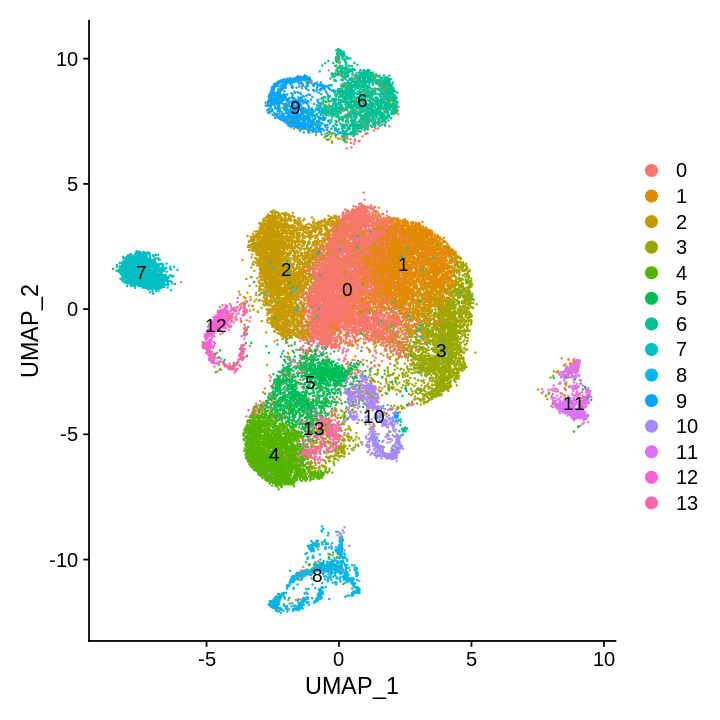

In [2]:
options(repr.plot.height = 6, repr.plot.width = 6)
load(file = '/data/Matthew/scrna/02.Clustering/crov7_alv_mincell5.Rdata')
DimPlot(seurat_obj, reduction = "umap", label = TRUE)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1118
Number of edges: 35381

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8791
Number of communities: 7
Elapsed time: 0 seconds


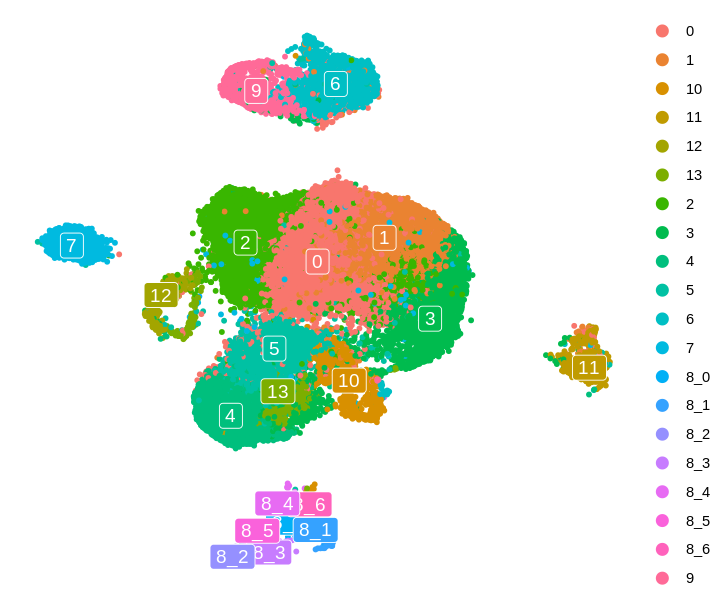

In [3]:
for (i in c("8")) {
  seurat_obj <- FindSubCluster(seurat_obj, cluster = i, graph.name = "RNA_snn", resolution = 0.3, algorithm = 1)
  sub_name <- as.factor(seurat_obj@meta.data$sub.cluster)
  names(sub_name) <- names(seurat_obj@active.ident)
  seurat_obj@active.ident <- sub_name
}
# add name to clusters
seurat_obj[["seurat_clusters"]] <- seurat_obj@active.ident

# for (i in c("13")) {
#   seurat_obj <- FindSubCluster(seurat_obj, cluster = i, graph.name = "RNA_snn", resolution = 0.2, algorithm = 1)
#   sub_name <- as.factor(seurat_obj@meta.data$sub.cluster)
#   names(sub_name) <- names(seurat_obj@active.ident)
#   seurat_obj@active.ident <- sub_name
# }
# add name to clusters
seurat_obj[["seurat_clusters"]] <- seurat_obj@active.ident

options(repr.plot.height = 5, repr.plot.width = 6)
DimPlot(seurat_obj, reduction = "umap", label = TRUE, pt.size = 1,label.box = T, label.color = "white") + theme_void()

In [4]:
cluster_mean_alevin <- AverageExpression(seurat_obj, features = VariableFeatures(seurat_obj))[['RNA']]

In [5]:
head(cluster_mean_alevin)
dim(cluster_mean_alevin)

,0,1,10,11,12,13,2,3,4,5,6,7,8_0,8_1,8_2,8_3,8_4,8_5,8_6,9
EVM0012714,0.97279241,0.86443777,2.4801450,2.95516545,1.52626474,5.7280834,1.72233865,1.42906619,2.44302880,3.9293431,1.11906084,14.0655480,1.1106770,30.8163240,817.6010909,459.3120828,6.4030963,37.9739238,0.9869179,1.71648056
EVM0034564,0.33217022,0.32795249,0.7431229,0.96398611,0.32476362,1.9096614,0.48112656,0.51661826,0.80605410,1.3457962,0.33517634,5.1461493,0.4100108,7.8336685,273.3180624,154.5266664,1.8295255,10.0310139,0.2352737,0.57817047
EVM0033736,0.05372527,0.04041038,0.4280135,0.03229125,0.15784112,0.3169117,0.08835504,0.03508836,0.03457946,0.2138890,0.09237965,0.3733788,44.1455671,14.7363138,0.5411637,0.9952633,15.4871854,31.3917089,37.2319549,0.08285287
EVM0021169,0.17738261,0.16284841,0.1797019,0.28708344,0.08620804,0.3156765,0.10787225,0.26316961,0.25416953,0.4711651,0.17339455,0.9979384,0.1629618,1.4050136,88.7773361,32.6675076,0.3324529,2.7559023,0.1234130,0.24216409
EVM0013196,0.23371389,0.11218249,0.4521085,0.20241288,70.16783607,2.1638644,0.46217635,0.25439150,0.23565285,0.3597622,0.23069193,1.5600345,0.3826995,0.2032844,0.3716294,0.1623807,0.3196678,0.2740401,0.3038378,0.50178665
EVM0005290,0.32698032,0.14565905,0.2356716,0.38999722,0.25357953,0.4071222,0.27914529,0.26227926,0.43128088,0.8372822,14.61078625,5.8746600,0.8026576,0.6588716,0.4114557,0.9373559,3.4420563,0.2037423,0.2372074,107.71758458


[1] 2000   20

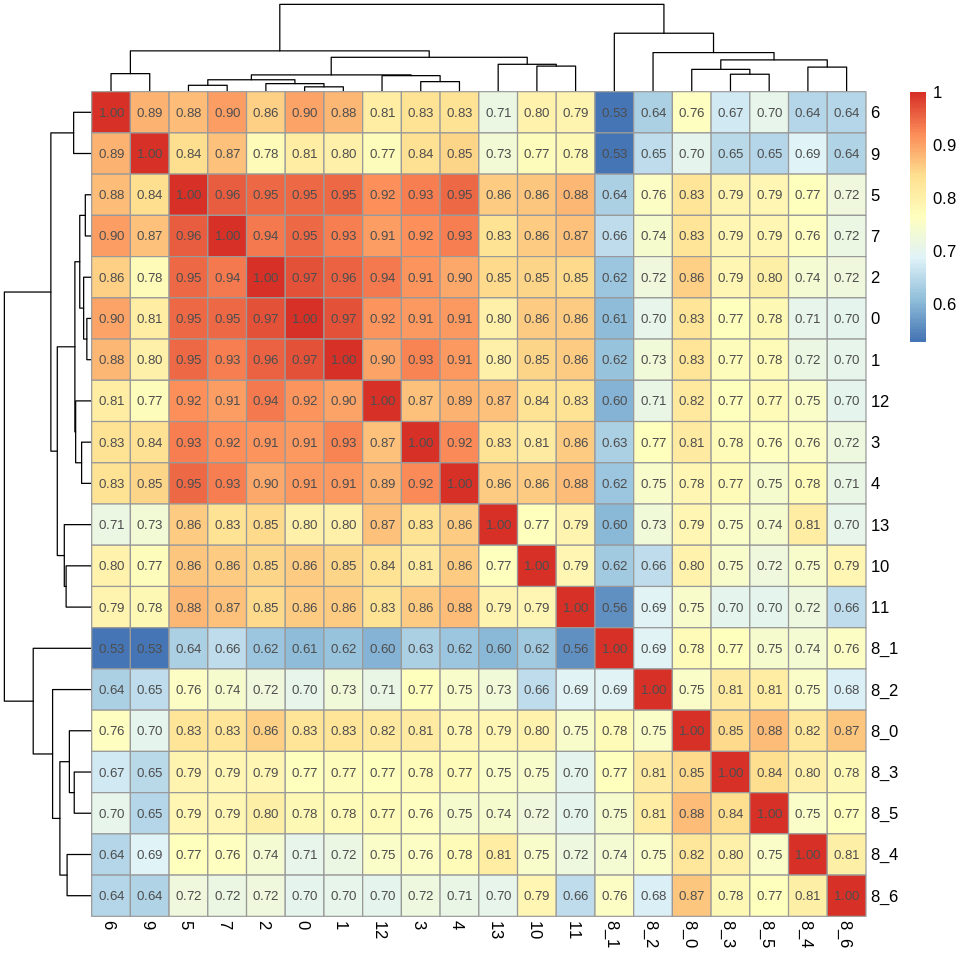

In [7]:
options(repr.plot.height = 8, repr.plot.width = 8)
cor_cluster_mean <- cor(cluster_mean_alevin, method = "sp")
pheatmap::pheatmap(cor_cluster_mean,
         display_numbers = T)

Distance cutoff calculated to 0.3962749 


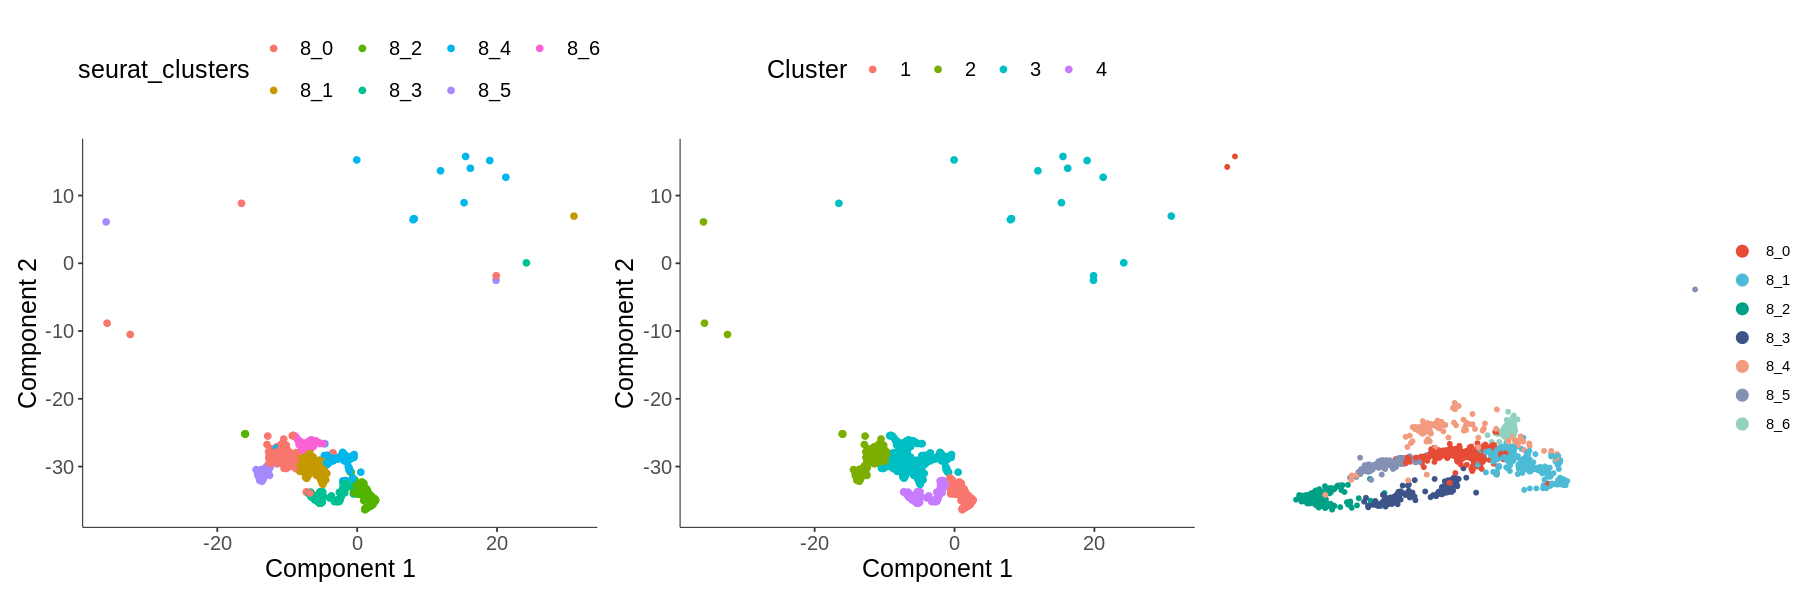

In [239]:
options(repr.plot.height = 5, repr.plot.width = 15)
# add name to clusters
# seurat_obj[["seurat_clusters"]] <- seurat_obj@active.ident
seurat_sub <- subset(seurat_obj,idents = c("8_0", "8_1", "8_2", "8_3", "8_4", "8_5", "8_6"))
# transform from Seurat object to CellDataSet
cds <- as.CellDataSet(seurat_sub, assay = "RNA", reduction = "tsne")
# do a basic clustering for plot
cds <- clusterCells(cds)
# plot clusters
p1 <- plot_cell_clusters(cds, color_by = "seurat_clusters")
p2 <- plot_cell_clusters(cds)
p_vc_umap <- DimPlot(seurat_sub, reduction = "umap") +
  scale_color_npg() +
  theme_void() 
p1 + p2 + p_vc_umap

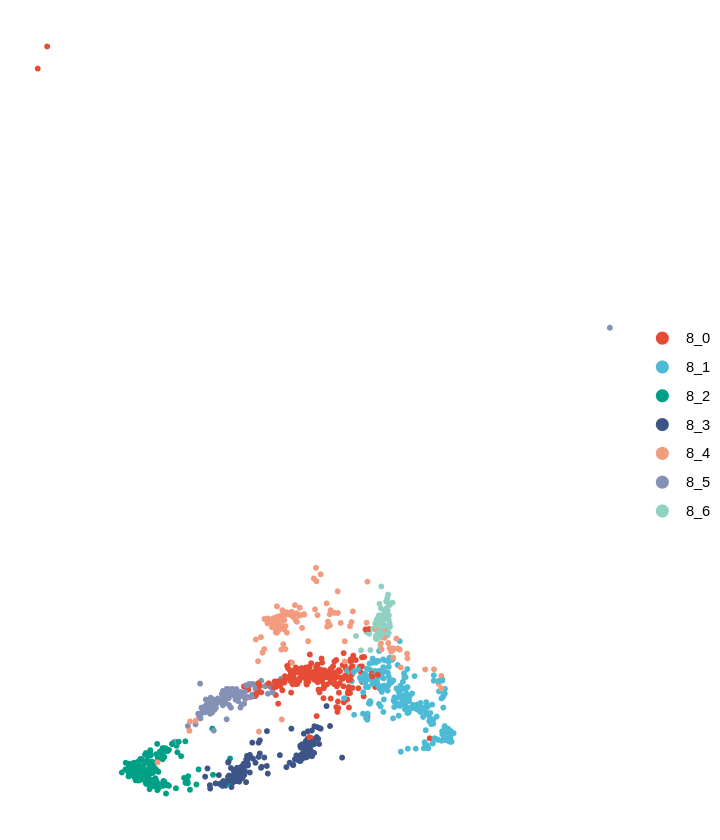

In [240]:
options(repr.plot.height = 7, repr.plot.width = 6)
p_vc_umap
ggsave("vc_sub.umap.pdf", height = 7, width = 6)

In [221]:
id_path <- '/data/Matthew/scrna/02.Clustering/id_latest/'
vc.id <- readLines(paste(id_path, 'vc-psd.id',sep = '/'))
vc.name <- readLines(paste(id_path, 'vc-psd.name',sep = '/'))

In [211]:
magic_obj <- seurat_obj
DefaultAssay(magic_obj) <- "MAGIC_RNA"
magic_sub <- subset(magic_obj,idents = as.character(c(0:7,9:13)), invert = T)

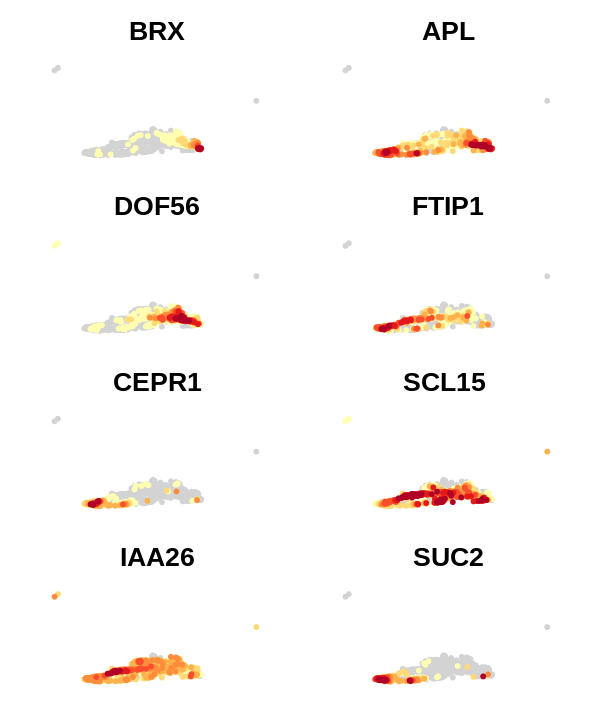

In [222]:
p7 <- FeaturePlot(magic_sub,
                  features = vc.id,
                  cols = c("lightgrey", brewer.pal(7, "YlOrRd")),
                  ncol = 2, order = T) & NoAxes() & NoLegend()
for (i in 1:length(vc.id)) p7[[i]]$labels$title = vc.name[i]
p7
ggsave('panels/vcpsd_FeaturePlot.pdf', p7, height = 14, width = 7)

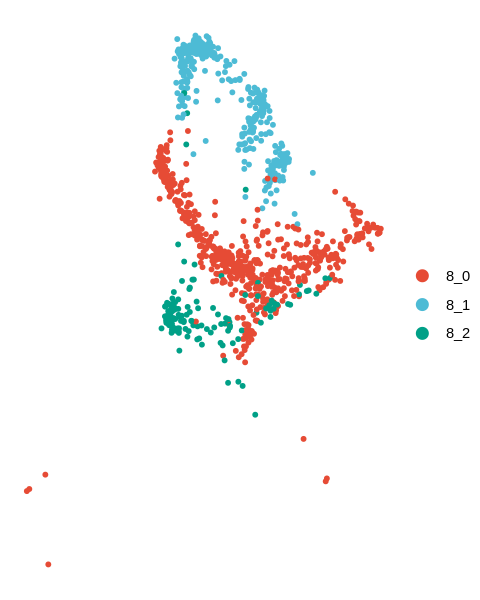

In [14]:
options(repr.plot.height = 5, repr.plot.width = 4)
p_vc_umap
ggsave('vc_umap.pdf', height = 5, width = 4)

## Trajectory step 1: choose genes that define a cell"s progress

### Method 1: Ordering based on genes that differ between clusters

In [172]:
cds@expressionFamily@vfamily <- "negbinomial.size"
cds <- estimateSizeFactors(cds)
cds <- estimateDispersions(cds)
cds <- detectGenes(cds, min_expr = 0.1)
expressed_genes <-  row.names(subset(fData(cds), num_cells_expressed >= 10))
clustering_DEG_genes <-
    differentialGeneTest(cds[expressed_genes,],
          fullModelFormulaStr = "~seurat_clusters",
          cores = 20)

Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”
Warning message:
“step size truncated due to divergence”
Removing 248 outliers

Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”
Warning message:
“step size truncated due to divergence”


In [173]:
options(warn = -1)

ordering_genes <- row.names(clustering_DEG_genes)[order(clustering_DEG_genes$qval)][1:1000]
cds <- setOrderingFilter(cds, ordering_genes = ordering_genes)
cds <- reduceDimension(cds, method = "DDRTree")
cds <- orderCells(cds)

options(warn = 0)

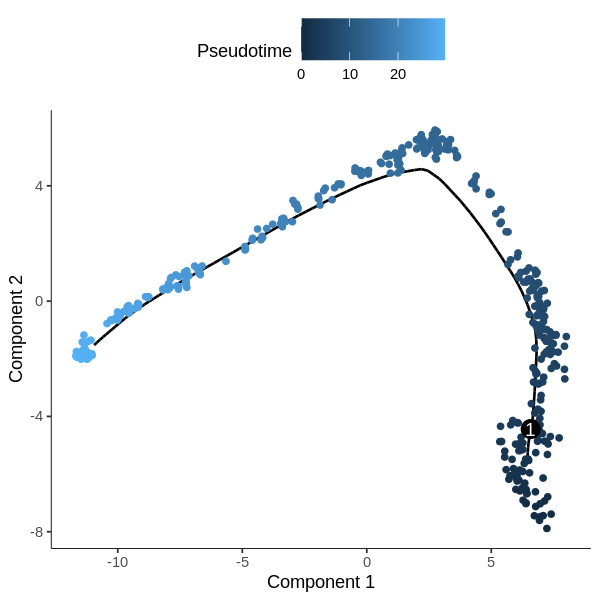

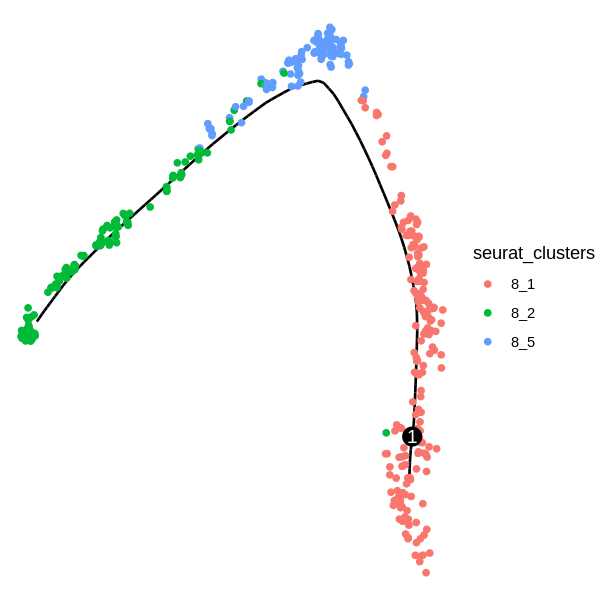

In [174]:
options(warn = -1)
cds_reverse_order <- orderCells(cds, reverse = T)
options(repr.plot.height = 5, repr.plot.width = 5)
plot_cell_trajectory(cds_reverse_order, color_by = "Pseudotime")
plot_cell_trajectory(cds_reverse_order, color_by = "seurat_clusters") + theme_void()

In [175]:
cds <- cds_reverse_order

In [225]:
pal_npg()(8)[c(1,2,5)]

[1] "#E64B35FF" "#4DBBD5FF" "#F39B7FFF"

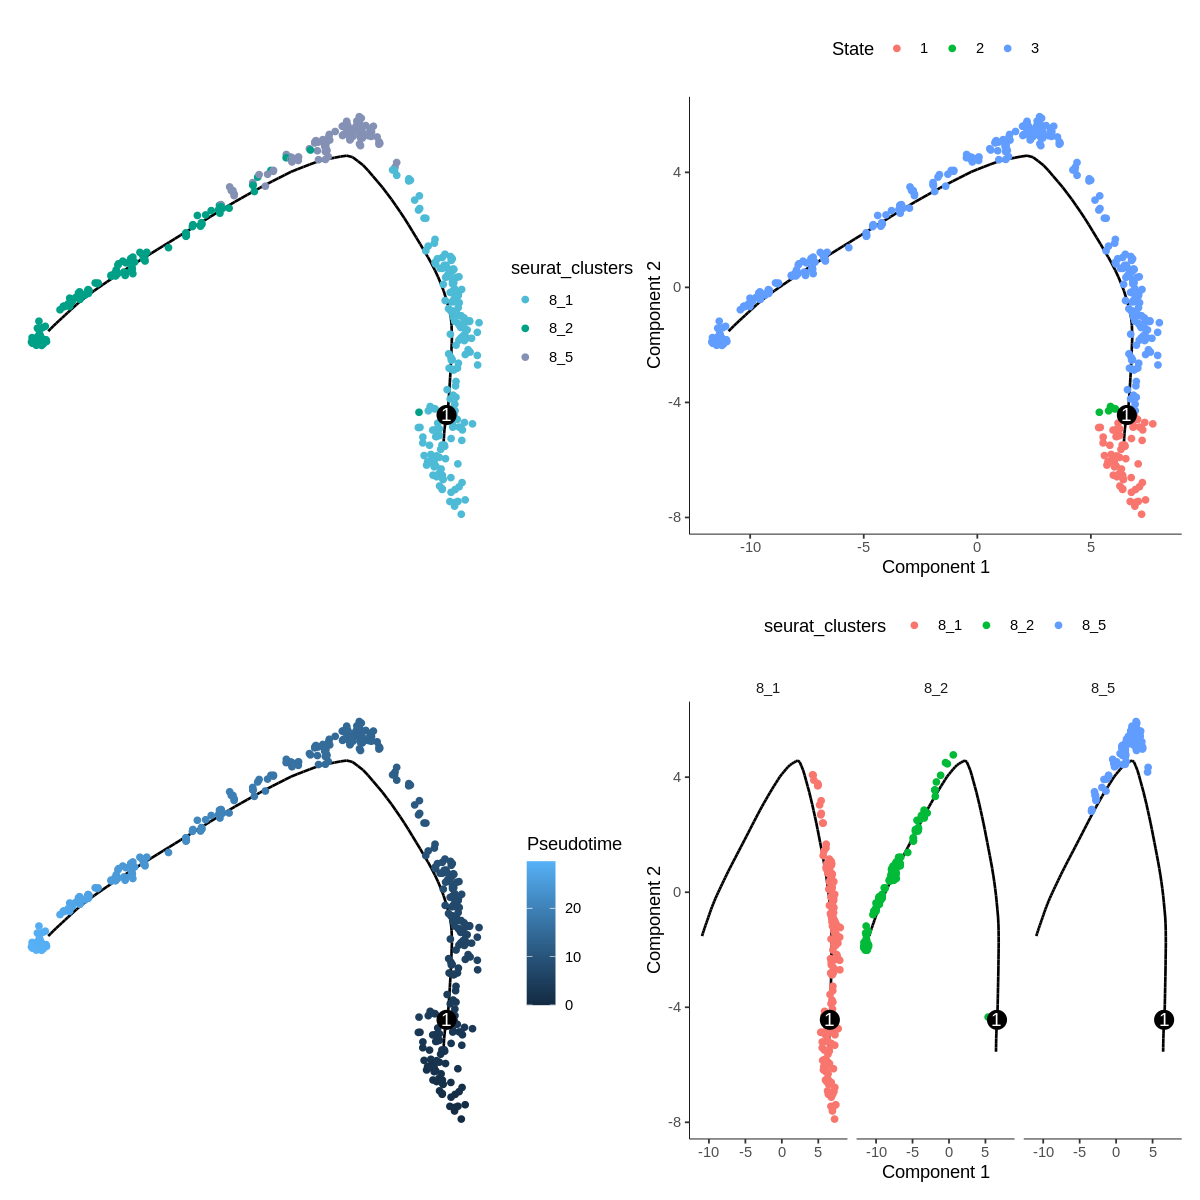

In [232]:
# options(repr.plot.height = 5, repr.plot.width = 5)
# plot_ordering_genes(cds)
options(repr.plot.height = 10, repr.plot.width = 10)
p1 <- plot_cell_trajectory(cds, color_by = "seurat_clusters") + theme_void() + scale_color_manual(values = pal_npg()(8)[c(2,3,6)])
p2 <- plot_cell_trajectory(cds, color_by = "State")
p3 <- plot_cell_trajectory(cds, color_by = "Pseudotime") + theme_void()
p4 <- plot_cell_trajectory(cds, color_by = "seurat_clusters") +
    facet_wrap(~seurat_clusters)
p1 + p2 + p3 + p4

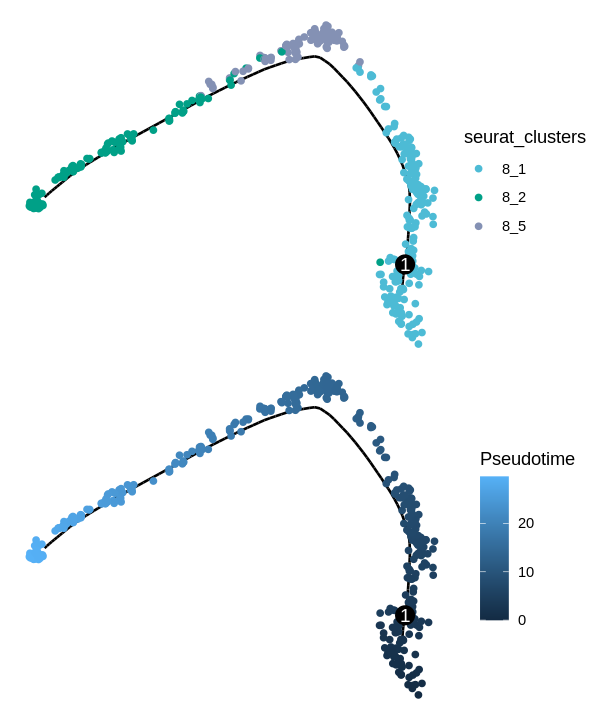

In [233]:
options(repr.plot.height = 6, repr.plot.width = 5)
p1/p3
ggsave(filename = 'vc_psdtime.pdf', width = 5, height = 6)

In [126]:
fData(cds) %>% head()

,vst.mean,vst.variance,vst.variance.expected,vst.variance.standardized,vst.variable,gene_short_name,num_cells_expressed,use_for_ordering
,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<chr>,<int>,<lgl>
EVM0006883,3.101497e-05,3.308263e-05,2.209508e-05,1.0000726,FALSE,EVM0006883,1,FALSE
EVM0032325,6.842152e-02,1.000244e-01,8.599623e-02,1.1631254,FALSE,EVM0032325,45,FALSE
EVM0007132,2.423044e-06,2.019204e-07,2.240751e-07,0.9011282,FALSE,EVM0007132,0,FALSE
EVM0022991,0.000000e+00,0.000000e+00,0.000000e+00,0.0000000,FALSE,EVM0022991,0,FALSE
EVM0024967,0.000000e+00,0.000000e+00,0.000000e+00,0.0000000,FALSE,EVM0024967,0,FALSE
EVM0022921,0.000000e+00,0.000000e+00,0.000000e+00,0.0000000,FALSE,EVM0022921,0,FALSE


## Differential Expression Analysis 
### Basic Differential Analysis

### Clustering Genes by Pseudotemporal Expression Pattern

In [177]:
diff_test_res <- differentialGeneTest(cds,
              fullModelFormulaStr = "~sm.ns(Pseudotime)",
              cores = 20)
sig_gene_names <- row.names(subset(diff_test_res, qval < 0.1))

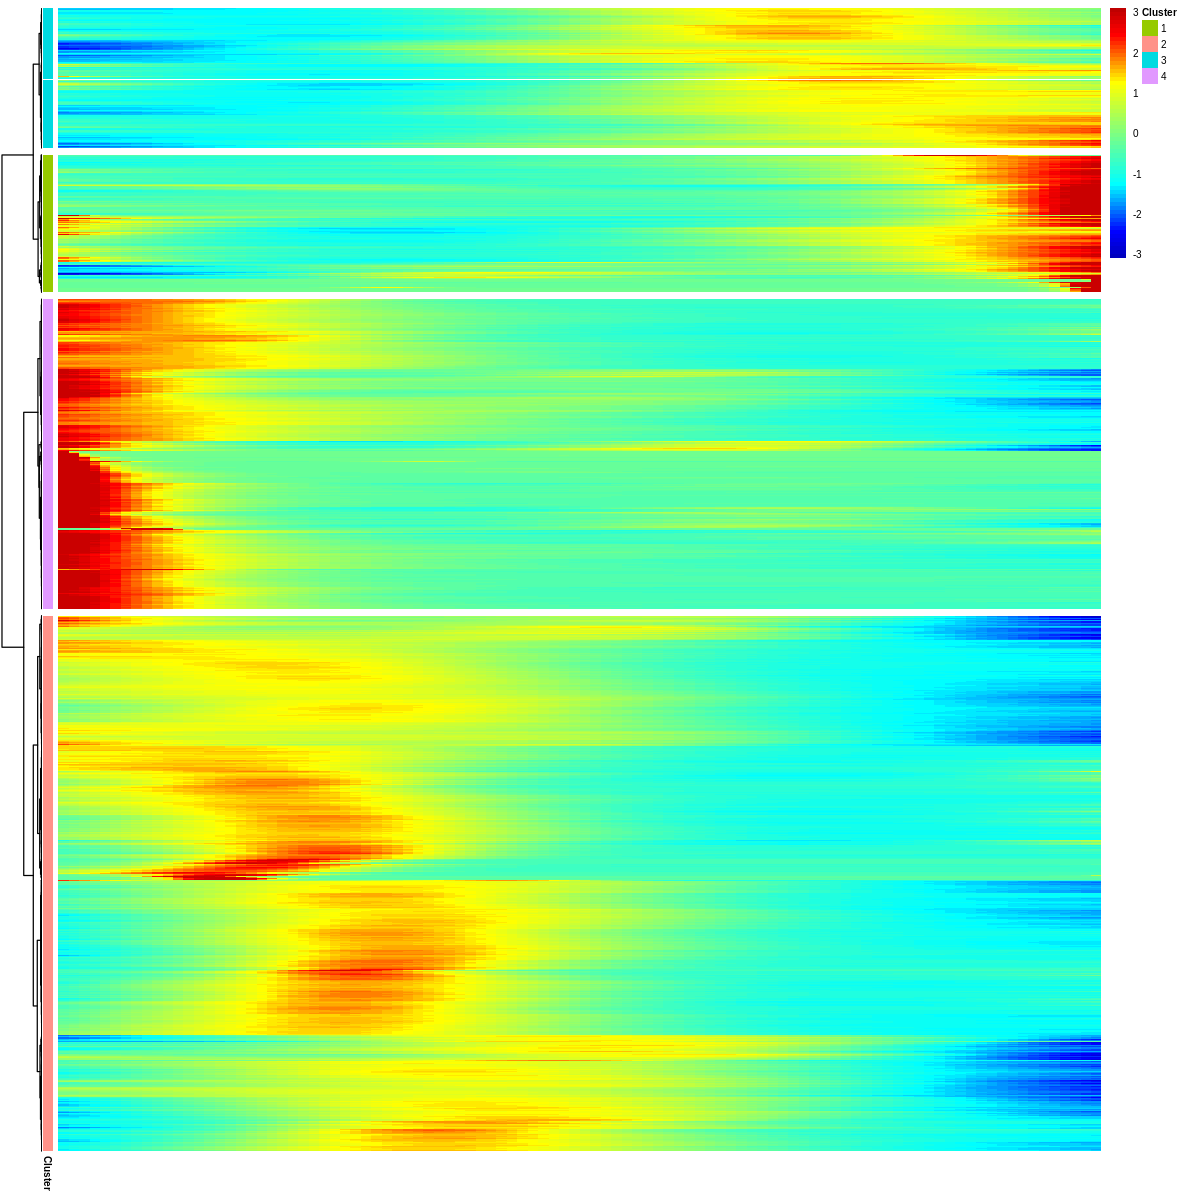

In [186]:
vc_heat <- plot_pseudotime_heatmap(cds[sig_gene_names,],
                num_clusters = 4,
                cores = 20,
                show_rownames = F,
                return_heatmap = T)

In [198]:
pdf(file = 'vc_psdheatmap1.pdf', width = 4, height = 5)
vc_heat
dev.off()

png 
  2

## Extract genes in heatmap clusters to perform GO enrichment

In [180]:
vc_heat$tree_row


Call:
hclust(d = d, method = method)

Cluster method   : ward.D2 
Number of objects: 5223 


In [181]:
clusters <- cutree(vc_heat$tree_row, k = 4)
clustering <- data.frame(clusters)
clustering[,1] <- as.character(clustering[,1])
colnames(clustering) <- "Gene_Clusters"
table(clustering)

clustering
   1    2    3    4 
 640 2492  650 1441 

In [182]:
head(clustering)

,Gene_Clusters
,<chr>
EVM0034578,1
EVM0033217,1
EVM0035514,1
EVM0034293,2
EVM0017897,3
EVM0023635,4


In [183]:
write.csv(clustering, file = 'vc_psddeg.csv')

In [ ]:
sessionInfo()